# Hyperparamater tuning

### Use Ridge regression with variable alpha to find best 20 degree polynomial to fit that fits the data

In [20]:
# Import required libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [8]:
# Open the file 'polynomial50.csv' as a dataframe
df = pd.read_csv('polynomial50.csv')

In [7]:
# Take a quick look at the data
df.head()

,x,f,y
0,0.000000,1.000000,0.923951
1,0.020408,1.039176,1.028283
2,0.040816,1.075173,1.069739
3,0.061224,1.108144,1.077327
4,0.081633,1.138242,1.105688


In [9]:
# Now, make separate numpy arrays for each column of the dataframe
x = df[['x']].values
y = df.y.values
f = df.f.values

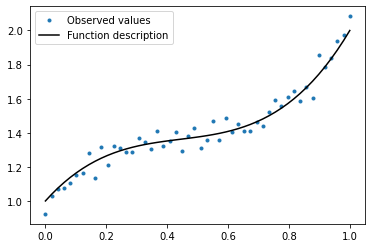

In [10]:
# Visualise the distribution of the x, y values & also the value of the true function f
fig, ax = plt.subplots()
ax.plot(x,y, '.', label = 'Observed values')
ax.plot(x,f, 'k-', label = 'Function description')
ax.legend(loc = 'best')

In [12]:
# We will learn a new way of making test, train splits by using index split
# get an index of training and valid data

itrain, ivalid= train_test_split(np.arange(len(x)), train_size = 0.8)

In [14]:
# Use the index to separate training and valid data for the predictor x & the response variable y 
xtrain,ytrain = x[itrain], y[itrain]
xvalid, yvalid= x[ivalid],y[ivalid]

In [16]:
# This a helper function that will help you plot the estimated polynomial regression along with the true values & true function
def plot_functions(d, est, ax, df, alpha, xvalid, Xvalid, xtrain, ytrain):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(df.x, df.f, color='k', label='f')
    ax.plot(xtrain, ytrain, 's', label="training", ms=5, alpha=0.3)
    ax.plot(xvalid, yvalid, 's', label="validation", ms=5, alpha=0.3)
    transx=np.arange(0,1.1,0.01)
    transX = PolynomialFeatures(d).fit_transform(transx.reshape(-1,1))
    ax.plot(transx, est.predict(transX),  '.', ms=7, alpha=0.8, label="alpha = %s" % str(alpha))

    # This is just aesthetics
    ax.set_ylim((1, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='lower right')

In [17]:
# This helper function will help you plot the magnitude of the coefficients of the polynomial regression
# The values will help you determine which powers of the feature are most influential
def plot_coefficients(est, ax, alpha):
    coef = est.coef_.ravel()
    ax.semilogy(np.abs(coef), marker='o', label="alpha = %s" % str(alpha))
    ax.set_ylim((1e-1, 1e15))
    ax.set_ylabel('abs(coefficient)')
    ax.set_xlabel('coefficients')
    ax.legend(loc='upper left')

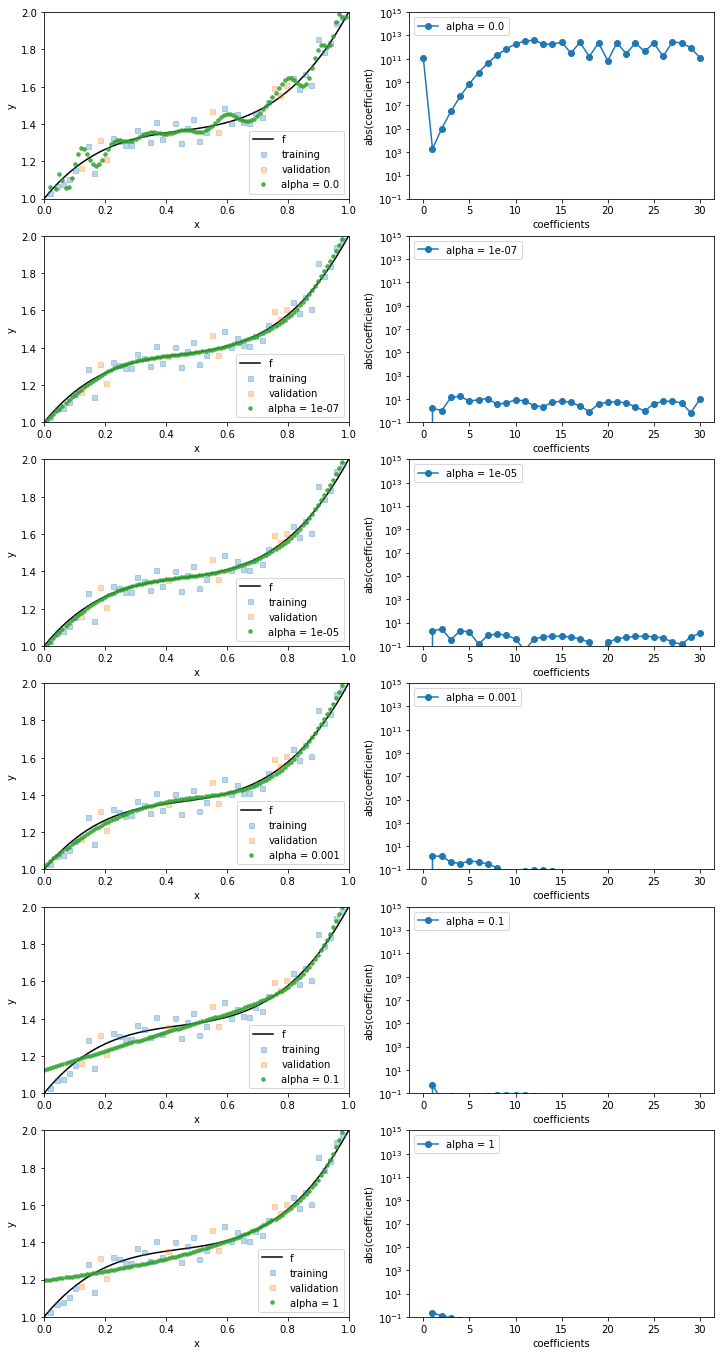

In [19]:
fig, rows = plt.subplots(6, 2, figsize=(12, 24))
d=30
alphas = [0.0, 1e-7,1e-5, 1e-3, 0.1,1]
training_error, validation_error = np.empty((2,len(alphas)))
Xtrain = PolynomialFeatures(d).fit_transform(xtrain)
Xvalid= PolynomialFeatures(d).fit_transform(xvalid)
for i, alpha in enumerate(alphas):
    l,r=rows[i]
    est = Ridge(alpha=alpha)
    est.fit(Xtrain, ytrain)
    ytrain_pred = est.predict(Xtrain)
    yvalid_pred = est.predict(Xvalid)
    training_error[i] = mean_squared_error(ytrain, ytrain_pred)
    validation_error[i] = mean_squared_error(yvalid, yvalid_pred)
    plot_functions(d, est, l, df, alpha, xvalid, Xvalid, xtrain, ytrain )
    plot_coefficients(est, r, alpha)

/Users/hargunoberoi/Desktop/Programming/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04067182816619198, tolerance: 0.0002480548590727577
  positive)
/Users/hargunoberoi/Desktop/Programming/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04064667148902673, tolerance: 0.0002480548590727577
  positive)
/Users/hargunoberoi/Desktop/Programming/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.040395573377868185, tolerance: 0.0002480548590727577
  positive)
/Users/hargunoberoi/Desktop/Programming/anaconda3/lib/python3.7/site-packages/

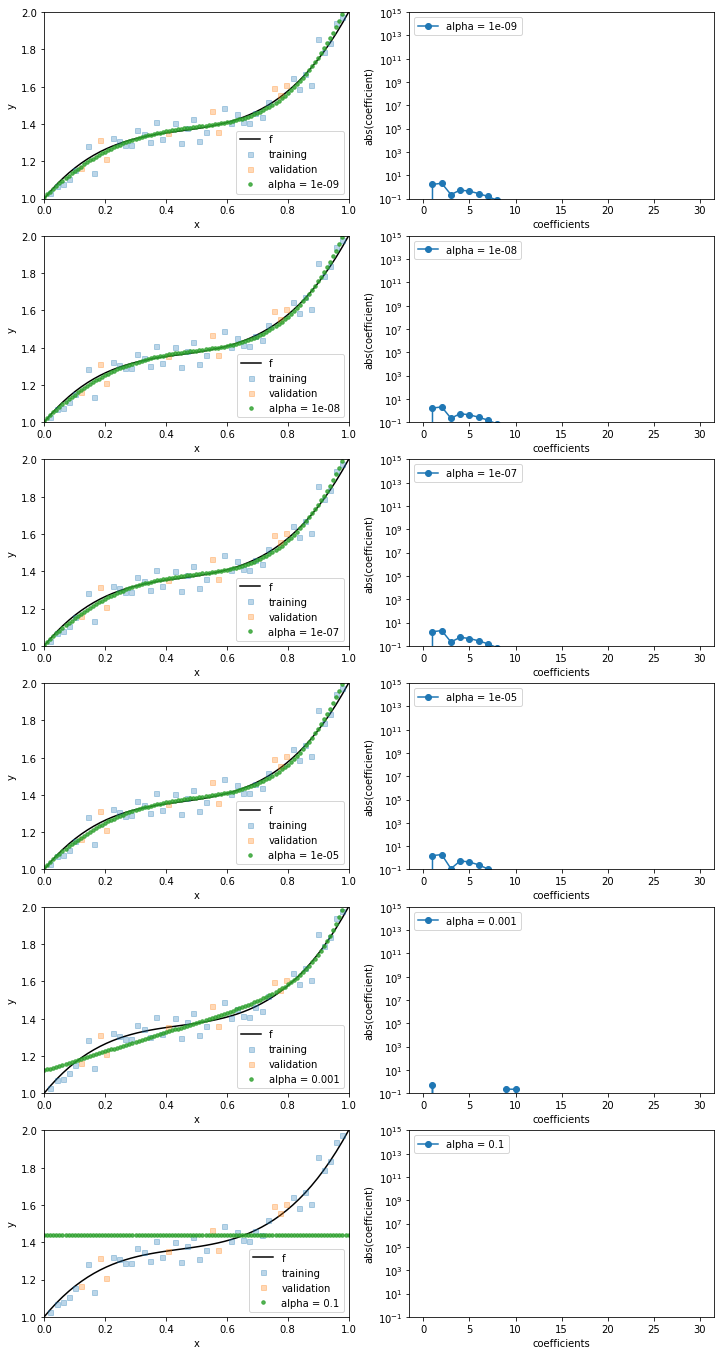

In [23]:
### Here you will fit for lasso
fig, rows = plt.subplots(6, 2, figsize=(12, 24))
d=30
alphas =  [1e-9,1e-8,1e-7,1e-5, 1e-3, 0.1]
training_error, validation_error = np.empty((2,len(alphas)))
Xtrain = PolynomialFeatures(d).fit_transform(xtrain)
Xvalid= PolynomialFeatures(d).fit_transform(xvalid)
for i, alpha in enumerate(alphas):
    l,r=rows[i]
    est = Lasso(alpha=alpha)
    est.fit(Xtrain, ytrain)
    ytrain_pred = est.predict(Xtrain)
    yvalid_pred = est.predict(Xvalid)
    training_error[i] = mean_squared_error(ytrain, ytrain_pred)
    validation_error[i] = mean_squared_error(yvalid, yvalid_pred)
    plot_functions(d, est, l, df, alpha, xvalid, Xvalid, xtrain, ytrain )
    plot_coefficients(est, r, alpha)

In [28]:
# Find the best value of hyper parameter, which gives the least error on the validdata
best_hyper = alphas[np.argmin(validation_error)]

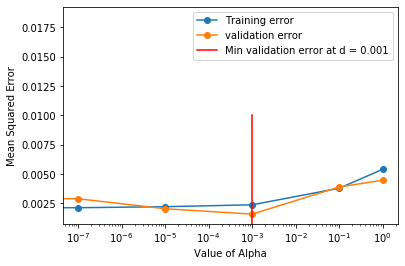

In [84]:
# Plot the errors as a function of increasing d value to visualise the training and validation errors
fig, ax = plt.subplots()
ax.plot(alphas, training_error, marker = 'o', label = 'Training error')
ax.plot(alphas, validation_error, marker = 'o', label = 'validation error')
ax.axvline(best_hyper, 0, 0.5, color = 'r', label = f'Min validation error at d = {best_hyper}')
ax.set_xlabel('Value of Alpha')
ax.set_ylabel('Mean Squared Error')
ax.legend(loc = 'best')
ax.set_xscale('log')